-------------------- 
#### Aim : deal with class imbalance issue
- use class-weight parameter of Logistic regression
-----------------------

In [3]:
# basic libraries
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.datasets import make_blobs, make_classification

In [4]:
# create a imbalanced dataset of 10K with 2 class
X, y = make_classification(n_samples    = 10000         # number of samples
                          ,n_features   = 2             # feature/label count
                          ,n_informative= 2             # informative features
                          ,n_redundant  = 0             # redundant features
                          ,n_repeated   = 0             # duplicate features
                          ,n_clusters_per_class=1       # number of clusters per class; clusters during plotting
                          ,weights      = [0.99]        # proportions of samples assigned to each class
                          ,flip_y       = 0             # fraction of samples whose class is assigned randomly. 
                          ,random_state = 13
                          ,class_sep    = .3
                          ,n_classes    = 2)            # change the class_sep to 1 or 0.5 to infuse lower separability

In [5]:
np.unique(y)

array([0, 1])

In [6]:
# club together into a dataframe
df = pd.DataFrame(X, columns=['x1','x2'])
df['y'] = y

df.head()

,x1,x2,y
0,-1.211993,0.542198,0
1,0.384230,-0.121678,0
2,-0.806794,0.446743,0
3,0.659971,-0.233430,0
4,-0.720019,0.351144,0


In [7]:
# check the distribution
df['y'].value_counts()/df.shape[0]

0    0.99
1    0.01
Name: y, dtype: float64

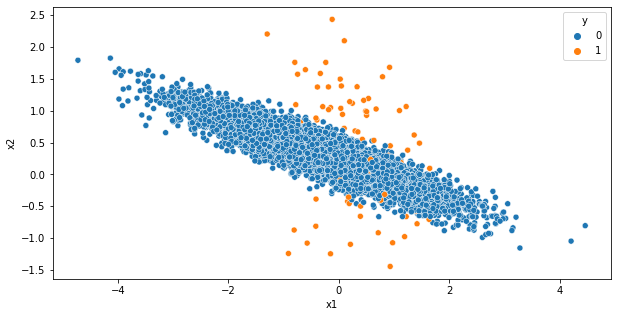

In [8]:
# scatter plot
plt.figure(figsize=(10,5))

sns.scatterplot(data=df, x='x1', y='x2', hue='y');

y = $b_0$ + $b_1.x_1$ + $b_2.x_1$ ...

In [9]:
# import model and matrics
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [10]:
# split dataset into x,y
X = df.drop('y',axis=1)
y = df['y']

In [11]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [12]:
# define model
lg1 = LogisticRegression(random_state=13, class_weight=None)

# fit it
lg1.fit(X_train,y_train)

# test
y_pred = lg1.predict(X_test)

In [13]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [14]:
cm = confusion_matrix(y_target=y_test, y_predicted=y_pred)
cm

array([[2971,    0],
       [  28,    1]])

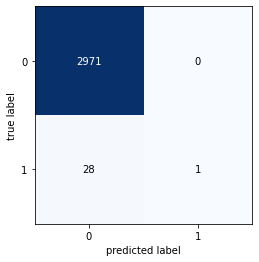

In [15]:
fig, ax = plot_confusion_matrix(conf_mat=cm)

In [16]:
# performance
print('Accuracy Score:     ', accuracy_score(y_test,y_pred))
print('Area Under Curve:   ', roc_auc_score(y_test, y_pred))
print('Precision score:    ', precision_score(y_test,y_pred))
print('Recall score:       ', recall_score(y_test,y_pred))

Accuracy Score:      0.9906666666666667
Area Under Curve:    0.5172413793103449
Precision score:     1.0
Recall score:        0.034482758620689655


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2971
           1       1.00      0.03      0.07        29

    accuracy                           0.99      3000
   macro avg       1.00      0.52      0.53      3000
weighted avg       0.99      0.99      0.99      3000



For minority class, above model is able to predict 14 correct out of 29 samples. 

For majority class, model got only one prediction wrong. 

Model is not doing a good job in predicting minority class.

## Weighted Logistic Regression

- In case of unbalanced label distribution, the best practice for weights is to use the inverse of the label distribution. 

- In our set, label distribution is 1:99 so we can specify weights as inverse of label distribution. 

- For majority class, will use weight of 1 and for minority class, will use weight of 99. So the penalty of wrong prediction of minority class would be 99 times more severe than wrong prediction of majority class.

In [25]:
w = {0:1, 1:99}

# define model
lg2 = LogisticRegression(..., class_weight=w)

0    0.99

1    0.01

In [17]:
# define class weights
w = {0:1, 1:99}

In [19]:
# define model
lg2 = LogisticRegression(random_state=13, class_weight='balanced')

# fit it
lg2.fit(X_train,y_train)

# test
y_pred = lg2.predict(X_test)

# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.658
Confusion Matrix: 
[[1955 1016]
 [  10   19]]
Area Under Curve: 0.6566000069638691
Recall score: 0.6551724137931034


With weighted-LG, Area-Under-Curve (AUC) increased drastically from 0.7412 to 0.8802. 

Recall score imporved from 0.4827 to 0.8620. Correct predictions for minority label increased as well. 

Though model has few wrong prediction in majority class, but custom weights have shown improvement in predicting minority class as expected.

## Weights GridSearch

There can be other combinations of weights which can perform equally good or may be 
better. 

#### option - 1 - using scikit learn class_weight package

In [29]:
from sklearn.utils import class_weight

__class_weight__: dict, ‘balanced’ or None
- If ‘balanced’, class weights will be given by n_samples / (n_classes * - np.bincount(y)). 
- If a dictionary is given, keys are classes and values are - corresponding class weights. 
- If None is given, the class weights will be uniform.

__classes__ 
Array of the classes occurring in the data, as given by np.unique(y_org) with y_org the original class labels.

__y__ array-like, shape (n_samples,)
Array of original class labels per sample;

In [30]:
weights = dict(enumerate(class_weight.compute_class_weight('balanced', np.unique(y), y)))
weights

D:\ANACONDA1\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0 1], y=0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: y, Length: 10000, dtype: int32 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


{0: 0.5050505050505051, 1: 50.0}

In [88]:
# define model
lg2 = LogisticRegression(random_state=13, class_weight=weights)

# fit it
lg2.fit(X_train,y_train)

# test
y_pred = lg2.predict(X_test)

# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.6516666666666666
Confusion Matrix: 
[[1935 1036]
 [   9   20]]
Area Under Curve: 0.670475516196799
Recall score: 0.6896551724137931


#### option - 2 - using grid search

In [60]:
# define weight hyperparameter
w = [{0:1000, 1:100}, {0:1000, 1:10},  {0:1000, 1:1.0},  {0:500,  1:1.0}, 
     {0:400,  1:1.0}, {0:300,  1:1.0}, {0:200,  1:1.0},  {0:150,  1:1.0}, 
     {0:100,  1:1.0}, {0:99,   1:1.0}, {0:10,   1:1.0},  {0:0.01, 1:1.0}, 
     {0:0.01, 1:10},  {0:0.01, 1:100}, {0:0.001,1:1.0},  {0:0.005,1:1.0}, 
     {0:1.0, 1:1.0},  {0:1.0, 1:0.1},  {0:10,  1:0.1},   {0:100, 1:0.1}, 
     {0:10,  1:0.01}, {0:1.0, 1:0.01}, {0:1.0, 1:0.001}, {0:1.0, 1:0.005}, 
     {0:1.0, 1:10},   {0:1.0, 1:99},   {0:1.0, 1:100},   {0:1.0, 1:150}, 
     {0:1.0, 1:200},  {0:1.0, 1:300},  {0:1.0, 1:400},   {0:1.0, 1:500}, 
     {0:1.0, 1:1000}, {0:10,  1:1000}, {0:100, 1:1000} ]

hyperparam_grid = {"class_weight": w }

In [62]:
# define model
lg3 = LogisticRegression(random_state=13)

# define evaluation procedure
grid = GridSearchCV(lg3, 
                    hyperparam_grid, 
                    scoring="roc_auc", 
                    cv=10, 
                    n_jobs=-1, 
                    refit=True)
grid.fit(X,y)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=13), n_jobs=-1,
             param_grid={'class_weight': [{0: 1000, 1: 100}, {0: 1000, 1: 10},
                                          {0: 1000, 1: 1.0}, {0: 500, 1: 1.0},
                                          {0: 400, 1: 1.0}, {0: 300, 1: 1.0},
                                          {0: 200, 1: 1.0}, {0: 150, 1: 1.0},
                                          {0: 100, 1: 1.0}, {0: 99, 1: 1.0},
                                          {0: 10, 1: 1.0}, {0: 0.01, 1: 1.0},
                                          {0: 0.01, 1: 10}, {0: 0.01, 1: 100},
                                          {0: 0.001, 1: 1.0},
                                          {0: 0.005, 1: 1.0}, {0: 1.0, 1: 1.0},
                                          {0: 1.0, 1: 0.1}, {0: 10, 1: 0.1},
                                          {0: 100, 1: 0.1}, {0: 10, 1: 0.01},
                                          {0: 1.0, 1: 0.01}, {0: 1.0, 1: 0.00

In [63]:
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Best score: 0.726030303030303 with param: {'class_weight': {0: 1.0, 1: 99}}


#### option - 3 - using grid searach - with other params

In [64]:
# define hyperparameters
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]

crange = np.arange(0.5, 20.0, 0.5)

hyperparam_grid = {"class_weight": w
                   ,"penalty": ["l1", "l2"]
                   ,"C": crange
                   ,"fit_intercept": [True, False]  }

In [67]:
%%time
# logistic model classifier
lg4 = LogisticRegression(random_state=13)

# define evaluation procedure
grid = GridSearchCV(lg4,hyperparam_grid,scoring="roc_auc", cv=100, n_jobs=-1, refit=True)
grid.fit(X,y)

KeyboardInterrupt: 

In [ ]:
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

## Finally, building logistic regression model with above optimal values.

In [72]:
# define model
lg4 = LogisticRegression(random_state=13,
                         C=13.0,
                         fit_intercept=True, 
                         penalty='l2',
                         class_weight={0: 1, 1: 100} )
# fit it
lg4.fit(X_train,y_train)
# test
y_pred = lg4.predict(X_test)

In [73]:
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}') # 0.5
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.897
Confusion Matrix: 
[[2666  305]
 [   4   25]]
Area Under Curve: 0.8797049640780418
Recall score: 0.8620689655172413
